# Quenched Fractions - Testing different distributions

__Author__: Victor Calderon

__Date__: 12/04/2017

__Last modified__: 12/04/2017

__Description__: This noteboook tests the _quenched fraction_ statistic on different types of statistical distributions

## Testing different distributions

Now we will test different distributions, and look at their '_quenched fraction_' results.

In [1]:
## Importing modules
%matplotlib inline
import os
import numpy as np
from numpy import random
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
import seaborn as sns
sns.set('notebook',font_scale=1.5)
import pandas as pd

In [2]:
def choice_distribution(distr='gaussian', samples=10000, **kwargs):
    """
    Produces an array drawn from `distr`
    
    Parameters
    ----------
    distr: string, optional (default = 'gaussian')
        choice of distribution to use
        Options:
            - 'gaussian': Gaussian distribution with `mean`, `std`, and amplitude `A`
            - 'uniform' : Uniform distribution with `low`, `high`
            - 'binomial': Binomial distribution with `p`and `n`
            - 'poisson' : Poisson distribution with `lam`
            - 'double gaussian': Double gaussian with `A1`, `mean1`, `std1`, `A2`, `mean2`, `std2`
    
    samples: int, optional (default = 10000)
        total of number of samples to compute
    
    Returns
    --------
    data_arr: numpy.ndarray, shape(samples,)
        array of values from `distr` distribution
    """
    # Gaussian Distribution
    if distr=='gaussian':
        data_arr = kwargs['A']*random.normal(loc=kwargs['mean'], scale=kwargs['std'], size=samples)
    # Uniform Distribution
    if distr=='uniform':
        data_arr = random.uniform(low=kwargs['low'],high=kwargs['high'],size=samples)
    # Bimodal Distribution
    if distr=='binomial':
        data_arr = random.binomial(n=kwargs['n'], p=kwargs['p'], size=samples)
    # Poisson Distribution
    if distr=='poisson':
        data_arr = random.poisson(lam=kwargs['lam'], size=samples)
    # Double-Gaussian Distribution
    if distr=='double gaussian':
        gauss_1  = kwargs['A1']*random.normal(loc=kwargs['mean1'], scale=kwargs['std1'], size=kwargs['sample1'])
        gauss_2  = kwargs['A2']*random.normal(loc=kwargs['mean2'], scale=kwargs['std2'], size=kwargs['sample2'])
        data_arr = np.concatenate((gauss_1, gauss_2))
    
    return data_arr

### Plotting different distributions
Now we can plot the different distributions that we want

In [3]:
def distr_plotting(data_dict, fig_dir=None, savefig=False, name=None, sharex=False, sharey=False, xlim=None,
                   ylim=None, ncols=3, nrows=2, figsize=(15,10), ext_f='pdf', plot_std=True):
    """
    Plots the distributions of `data_arr`
    
    Parameters:
    -----------
    data_arr: python dictionary
        dictionary containing values of different distributions
    
    fig_dir: string or None
        path to the `figures` directory
    
    savefig: boolean, optional (default = False)
        option to save the figure to the `fig_dir` folder.
    """
    ## Creating new figure
    fig, axes = plt.subplots(nrows, ncols, facecolor='white', figsize=figsize, sharex=sharex, sharey=sharey)
    cmap = mpl.cm.autumn
    ## Looping over keys in `data_dict`
    for ii, key in enumerate(data_dict.keys()):
        ax      = axes.flatten()[ii]
        data_ii = data_dict[key]
        color   = cmap(ii / float(len(data_dict.keys())))
        sns.distplot(data_ii, label=key, ax=axes.flatten()[ii],color=color)
        ## Mean and St. Dev.
        ax.axvline(x=data_ii.mean(), label='Mean: {0:.04f}'.format(data_ii.mean()))
        if plot_std:
            ax.axvspan(data_ii.mean() - data_ii.std(), data_ii.mean()+data_ii.std(),
                        color=color,alpha=0.4, label='St. Dev: {0:.3f}'.format(data_ii.std()))
        ax.legend(loc="upper left")
        ## Setting limits
        if xlim:
            ax.set_xlim(xlim)
        if ylim:
            ax.set_ylim(ylim)
    fig.suptitle(name)
    
    ## Saving figures
    if savefig:
        plt.savefig(os.path.join(fig_dir, 'MCF_distr_results_{0}.{1}'.format(name, ext_f)))

Now we can use the function that computes the __quenched fractions__ results!

## Defining different distributions

Here, we plot the different distributions

In [20]:
### Pre-packaged initializers
distr_dict = {}
distr_dict['A'      ] = 1
distr_dict['mean'   ] = 10
distr_dict['std'    ] = 2.5
distr_dict['low'    ] = 10
distr_dict['high'   ] = 20
distr_dict['p'      ] = 0.5
distr_dict['n'      ] = 10
distr_dict['lam'    ] = 20
distr_dict['A1'     ] = 10
distr_dict['A2'     ] = 10
distr_dict['mean1'  ] = 20
distr_dict['mean2'  ] = 10
distr_dict['std1'   ] = 2
distr_dict['std2'   ] = 7
distr_dict['sample1'] = 1000
distr_dict['sample2'] = 2000
samples = 100000
itern   = 100000

## Computing `data` for each distribution
distr_names = ['gaussian','uniform','binomial','poisson','double gaussian']
data_dict   = {}
for distr_ii in distr_names:
    data_dict[distr_ii] = choice_distribution(distr=distr_ii, samples=samples, **distr_dict)
    
fig_dir = os.path.join(os.path.realpath('./'),'figures')
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [21]:
data_dict

{'binomial': array([8, 6, 4, ..., 4, 5, 5]),
 'double gaussian': array([ 199.79949342,  223.80492315,  234.60339336, ...,   93.38411055,
         111.48066581,  206.2686419 ]),
 'gaussian': array([  6.83478814,   9.39790535,   6.1526209 , ...,  11.1777766 ,
         11.96581987,   9.76453654]),
 'poisson': array([20, 22, 24, ..., 21, 18, 17]),
 'uniform': array([ 13.61615167,  16.72132877,  15.3218412 , ...,  16.95535988,
         12.55174548,  16.05128059])}

## Reading in SDSS DR7 data

Now we can go ahead and read in the data from the catalogue

In [23]:
import custom_utilities_python as cu

In [33]:
## Reading in catalogue and `cleaning` it
DR7_catl = cu.sdss_catl_clean(
            cu.read_hdf5_file_to_pandas_DF(cu.extract_catls('data','mr','19',print_filedir=False)[0]),'data')

## Selecting specifiy mass
Mh_key = 'M_h'
DR7_catl_m = DR7_catl.loc[(DR7_catl[Mh_key] >= 11.6) & (DR7_catl[Mh_key] <= 12.)]
DR7_catl_m.head()

## Adding `sersic` array to main dictionary
data_dict['sersic'] = DR7_catl_m['sersic'].values

## Plotting distributions

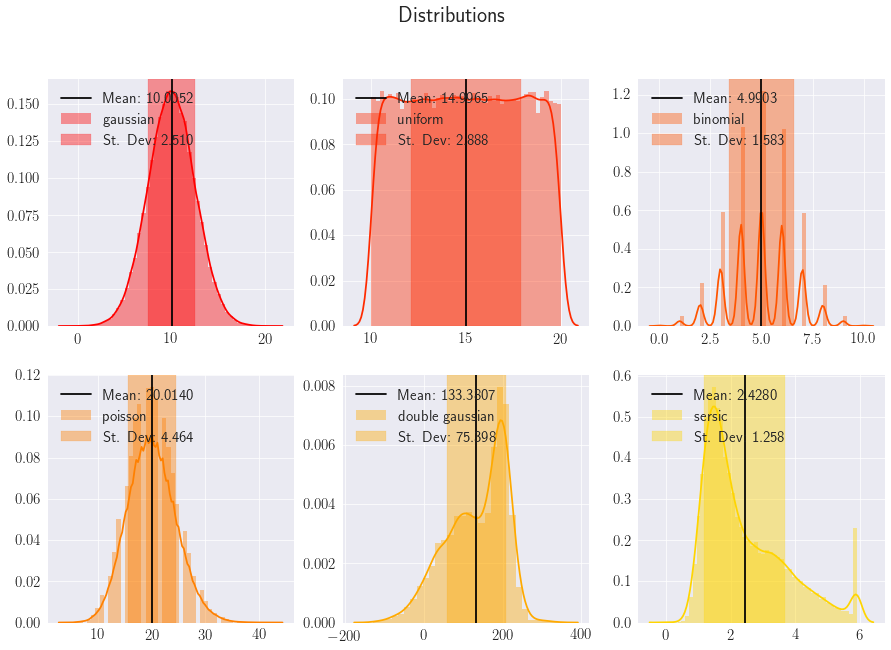

In [35]:
distr_plotting(data_dict,fig_dir=fig_dir, savefig=True, name='Distributions')